<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === Setup & Load with auto-check ===
import os
import pandas as pd

repo_url = "https://github.com/lujainAziz/LujainAlmajyul-it326.git"
repo_name = "LujainAlmajyul-it326"
dataset_path = f"{repo_name}/Dataset/Raw_dataset.csv"

if os.path.exists("Dataset/Raw_dataset.csv"):
    print(" Found Dataset/Raw_dataset.csv")
    df = pd.read_csv("Dataset/Raw_dataset.csv")

elif os.path.exists(dataset_path):
    print(" Found inside cloned repo")
    df = pd.read_csv(dataset_path)

else:
    print(" Cloning repository from GitHub...")
    !git clone {repo_url}
    if os.path.exists(dataset_path):
        df = pd.read_csv(dataset_path)
    else:
        raise FileNotFoundError("file not found neither locally nor in github")



 Found inside cloned repo


#####the code check that there is no problem while reading the file

--------------------------------------------------------------------------------
## Statistical Summary

In [2]:
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns
stat_summary = df[num_cols].describe(percentiles=[0.25,0.5,0.75]).T

stat_summary = stat_summary.rename(columns={
    "25%": "Q1 (25%)",
    "50%": "Median (50%)",
    "75%": "Q3 (75%)"
})

display(stat_summary.style
        .background_gradient(cmap="Blues")
        .format(precision=2))

,count,mean,std,min,Q1 (25%),Median (50%),Q3 (75%),max
StudentID,2392.00,2196.50,690.66,1001.00,1598.75,2196.50,2794.25,3392.00
Age,2392.00,16.47,1.12,15.00,15.00,16.00,17.00,18.00
Gender,2392.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Ethnicity,2392.00,0.88,1.03,0.00,0.00,0.00,2.00,3.00
ParentalEducation,2392.00,1.75,1.00,0.00,1.00,2.00,2.00,4.00
StudyTimeWeekly,2392.00,9.77,5.65,0.00,5.04,9.71,14.41,19.98
Absences,2392.00,14.54,8.47,0.00,7.00,15.00,22.00,29.00
Tutoring,2392.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
ParentalSupport,2392.00,2.12,1.12,0.00,1.00,2.00,3.00,4.00
Extracurricular,2392.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00


### Statistical Summary
**Description:**  
This table summarizes key statistics for each numeric attribute, including count, mean, standard deviation, minimum, quartiles (Q1, Q3), median, and maximum values.  

**Insight:**  
The results show large differences in value ranges across attributes.  
For instance, *StudyTimeWeekly* ranges from 0.01–20, *Absences* from 0–29, while *GPA* is limited to 0–4.  
These variations confirm that numeric attributes are measured on different scales and should not be compared directly.  

**Decision:**  
Normalization or scaling will be necessary in the preprocessing phase to make all numeric features comparable and prevent larger-scale features from dominating the models.

--------------------------------------------------------------------------------
## Missing Values

In [3]:
import pandas as pd

missing = df.isna().sum().sort_values(ascending=False)
missing_df = pd.DataFrame({"Missing Values": missing})

display(
    missing_df.style
    .background_gradient(cmap="Reds")
    .format(precision=0)
)

,Missing Values
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


### Missing Values
**Description:**  
This table displays the count of missing entries for each feature in the dataset.  
All columns show zero missing values, confirming that the dataset is complete and consistent.  

**Insight:**  
The absence of missing data indicates high data quality.  
No imputation or data cleaning is required, which allows focusing on scaling, normalization, and handling possible range differences.  

**Decision:**  
No missing value treatment is needed.  
All attributes can proceed directly to normalization and feature transformation.

--------------------------------------------------------------------------------
## Histogram

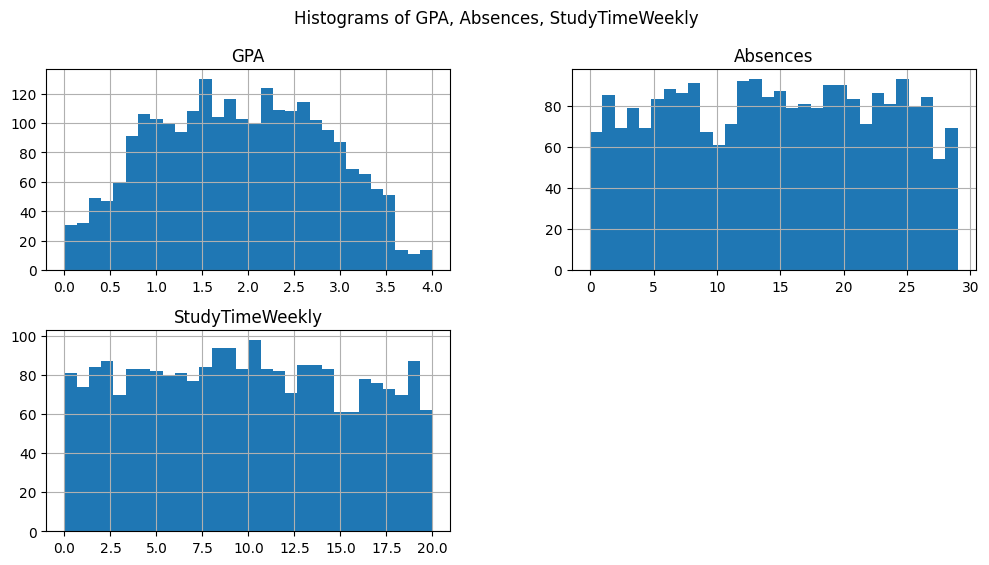

In [4]:
import matplotlib.pyplot as plt
df[['GPA','Absences','StudyTimeWeekly']].hist(bins=30, figsize=(12,6))
plt.suptitle("Histograms of GPA, Absences, StudyTimeWeekly")
plt.show()

### Histograms (GPA, Absences, StudyTimeWeekly)

**Description:**  
The histograms display the frequency distributions of three numeric attributes GPA, Absences, and StudyTimeWeekly to visualize how data values are spread or concentrated within their ranges.

**Insight:**  
- **GPA:** Values range from 0 to 4, with most students concentrated between 1.0 and 3.0, indicating moderate academic performance.  
- **Absences:** The values range from 0 to 29 and are fairly spread, but a few students have higher absence counts close to 30, suggesting occasional irregular attendance.  
- **StudyTimeWeekly:** Values range from 0 to around 20 hours per week, with slight clustering around 10 hours, showing diverse study patterns among students.  

**Decision:**  
Because these attributes vary widely in both range and spread, normalization is necessary to bring them to a comparable scale.  
Additionally, mild outlier capping may be applied to Absences if high values are found to disproportionately influence analysis or model performance.

--------------------------------------------------------------------------------
## Boxplot & Outlier

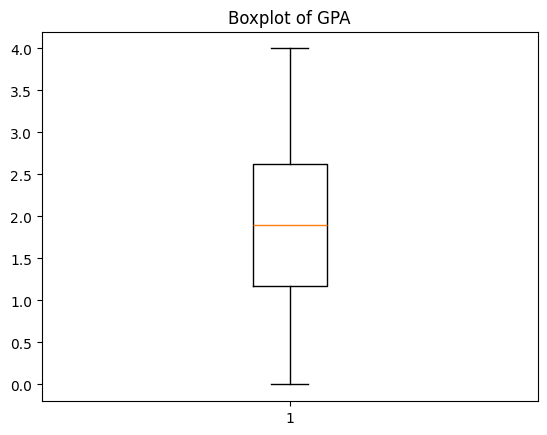

GPA: Outliers=0


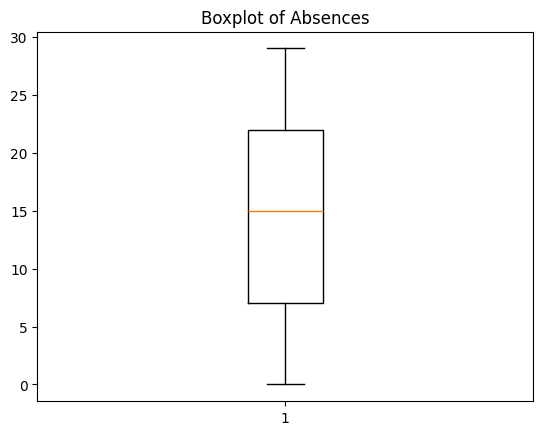

Absences: Outliers=0


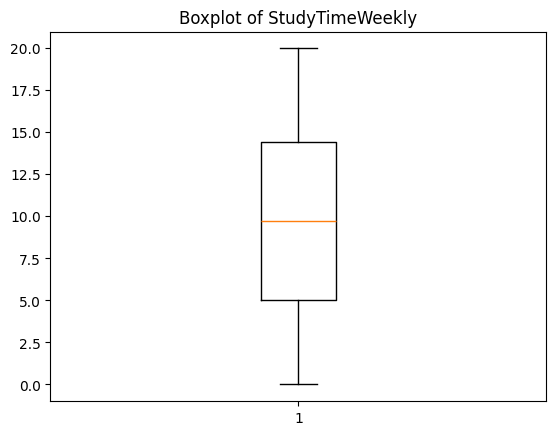

StudyTimeWeekly: Outliers=0


In [5]:
def iqr_bounds(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

for c in ['GPA','Absences','StudyTimeWeekly']:
    plt.figure()
    plt.boxplot(df[c])
    plt.title(f"Boxplot of {c}")
    plt.show()

    lo, hi = iqr_bounds(df[c])
    outliers = ((df[c] < lo) | (df[c] > hi)).sum()
    print(f"{c}: Outliers={outliers}")

### Boxplots & Outliers
**Description:**  
Boxplots visualize the data spread and detect potential outliers by showing quartiles (Q1–Q3), the median, and whiskers for each numeric variable.  

**Insight:**  
No extreme outliers were detected for GPA, Absences, or StudyTimeWeekly all data points fall within acceptable boundaries.  
However, the box sizes vary: GPA has a narrow range, while Absences and StudyTimeWeekly span wider intervals, confirming range differences.  

**Decision:**  
Outlier removal is not necessary.  
However, normalization will still be applied to handle the varying scales among numeric attributes.

--------------------------------------------------------------------------------
## Bar Plot

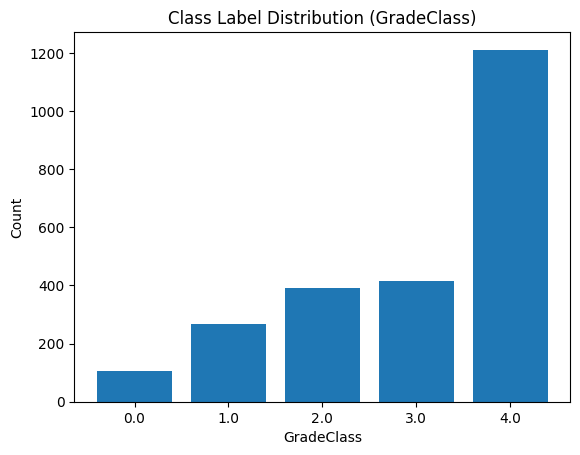

In [6]:
counts = df['GradeClass'].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Class Label Distribution (GradeClass)")
plt.xlabel("GradeClass")
plt.ylabel("Count")
plt.show()


### Bar Plot (Class Label Distribution)
**Description:**  
The bar chart shows the number of students in each GradeClass (0–4), representing the performance levels of the dataset.  

**Insight:**  
The dataset is highly imbalanced most students belong to GradeClass 4 (high achievers), while very few are in GradeClass 0.  
Intermediate categories (1–3) have moderate representation.  
This imbalance may lead classification models to favor the majority class.  

**Decision:**  
During preprocessing and modeling, resampling techniques or class-balancing strategies may be needed to prevent model bias and ensure fair performance across all categories.

--------------------------------------------------------------------------------
## Scatter Plot

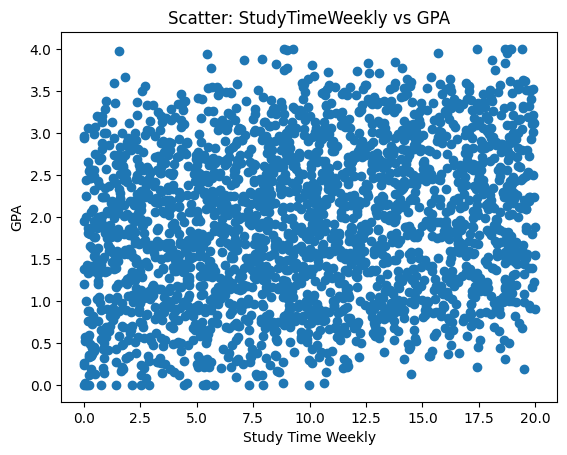

In [7]:
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.title("Scatter: StudyTimeWeekly vs GPA")
plt.xlabel("Study Time Weekly")
plt.ylabel("GPA")
plt.show()

### Scatter Plot (StudyTimeWeekly vs GPA)

**Description:**  
The scatter plot illustrates the relationship between weekly study time and GPA.  
Each point represents a student’s GPA against their weekly study hours.  

**Insight:**  
A weak positive trend is visible students who study more hours weekly tend to achieve slightly higher GPAs.  
However, the relationship is not perfectly linear, suggesting that other factors (such as tutoring or parental support) may also influence academic performance.  

**Decision:**  
StudyTimeWeekly is an important predictive attribute for GPA and should be retained for modeling.  
It will be normalized along with other numeric variables to ensure balanced scaling and consistent contribution in later analysis.

---
## Noise Removal

### Noise Removal (Outlier Analysis)
- **Description:** Boxplots were used to examine possible outliers in `GPA`, `Absences`, and `StudyTimeWeekly`.  
- **Insight:** No significant outliers were detected; all values fell within the whiskers.  
- **Decision:** Since the dataset is clean and free from extreme noise, no capping or removal was required.  
  This confirms that the data quality is already suitable for normalization and modeling.

---
## Variable Transformation

In [8]:
from sklearn.preprocessing import PowerTransformer

df[['StudyTimeWeekly']].head()

pt = PowerTransformer(method='yeo-johnson')
df['StudyTimeWeekly_transformed'] = pt.fit_transform(df[['StudyTimeWeekly']])

display(df[['StudyTimeWeekly', 'StudyTimeWeekly_transformed']].head())

,StudyTimeWeekly,StudyTimeWeekly_transformed
0,19.833723,1.624898
1,15.408756,0.982232
2,4.210570,-0.952350
3,10.028829,0.127953
4,4.672495,-0.856924


### Transformation (Yeo-Johnson)
**Description:**

The Yeo-Johnson transformation is applied to reduce skewness in the StudyTimeWeekly feature and make its distribution more normal. This step helps stabilize variance and improve model performance.

**Insight:**

After the transformation, the values of StudyTimeWeekly are more symmetrically distributed around zero, making it suitable for algorithms that assume normality.

**Decision:**

 The transformed feature (StudyTimeWeekly_transformed) will replace the original one in modeling to ensure better scaling and more consistent predictions.

**Why this technique:**

The column StudyTimeWeekly had a skewed distribution.
Skewed data can make models less accurate.
Using PowerTransformer (Yeo-Johnson) makes the distribution closer to normal.

**How it was applied:**

Applied the transformer to StudyTimeWeekly to stabilize variance and reduce skewness.

**Columns:**

StudyTimeWeekly

**Before & After:**

Before transformation, values were highly spread.
After transformation, they became more centered near 0.

**How it improved the dataset:**

The data distribution is now more symmetrical, improving model learning.

---
## Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

df[['GPA', 'Absences']].head()

scaler = StandardScaler()
df[['GPA_scaled', 'Absences_scaled']] = scaler.fit_transform(df[['GPA', 'Absences']])

display(df[['GPA', 'GPA_scaled', 'Absences', 'Absences_scaled']].head())

,GPA,GPA_scaled,Absences,Absences_scaled
0,2.929196,1.118086,7,-0.890822
1,3.042915,1.242374,0,-1.717694
2,0.112602,-1.960277,26,1.353542
3,2.054218,0.161790,14,-0.063951
4,1.288061,-0.675573,17,0.290422


### Normalization (StandardScaler)
**Description:**

Standardization is applied to GPA and Absences to scale their values so that they have a mean of 0 and a standard deviation of 1.

**Insight:**

After normalization, both features are on the same scale, preventing large numerical values (like Absences) from dominating smaller ones (like GPA).

**Decision:**

The scaled features (GPA_scaled and Absences_scaled) will be used for modeling to ensure fair contribution of all numeric attributes.

**Why this technique:**

GPA ranges from 0 to 4, while Absences can be much higher.
Without scaling, large-range features can dominate learning.

**How it was applied:**

Used StandardScaler from sklearn to make both columns have mean = 0 and standard deviation = 1.

**Columns:**

GPA, Absences

**Before & After:**

Before: very different numeric ranges.
After: both standardized between roughly –1 and 1.

**How it improved the dataset:**

Now all features contribute equally to the model, avoiding bias.

---
## Discretization

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

df[['GPA']].head()

kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['GPA_binned'] = kbins.fit_transform(df[['GPA']])

display(df[['GPA', 'GPA_binned']].head())

,GPA,GPA_binned
0,2.929196,3.0
1,3.042915,3.0
2,0.112602,0.0
3,2.054218,2.0
4,1.288061,1.0


###Discretization (Quantile Strategy)

**Description:**

The GPA feature is divided into four bins using quantile-based discretization. Each bin represents a performance level ranging from low to high.

**Insight:**

Most students fall into the middle or higher bins, indicating that GPA values are slightly skewed toward higher academic performance.

**Decision:**

The binned feature (GPA_binned) will be used for classification tasks to simplify model interpretation and improve performance

**Why this technique:**

Transforming GPA into categories helps simplify the model and make interpretation easier.

**How it was applied:**

Used KBinsDiscretizer with 4 bins and quantile strategy to group students by GPA levels.

Columns:
GPA

**Before & After:**

Before: continuous values between 0 and 4.
After: divided into 4 categories (0 – 3).

**How it improved the dataset:**

Grouping similar GPA values improves interpretability and prepares the data for classification.

---

### Encoding (Categorical Attributes)

**Description:**  
All categorical attributes in the dataset were *already provided as numeric codes* in the original CSV file.  
This means that **label encoding had been done previously** when the dataset was prepared.

Below is a clarification of what each numeric code represents:

| Attribute | Meaning / Encoded Values |
|------------|--------------------------|
| **Gender** | 0 → Male, 1 → Female |
| **Ethnicity** | 0 → Caucasian, 1 → African American, 2 → Asian, 3 → Other |
| **ParentalEducation** | 0 → None, 1 → High School, 2 → Some College, 3 → Bachelor’s, 4 → Higher |
| **ParentalSupport** | 0 → None, 1 → Low, 2 → Moderate, 3 → High, 4 → Very High |
| **Tutoring** | 0 → No, 1 → Yes |
| **Extracurricular** | 0 → No, 1 → Yes |
| **Sports** | 0 → No, 1 → Yes |
| **Music** | 0 → No, 1 → Yes |
| **Volunteering** | 0 → No, 1 → Yes |

**Insight:**  
Since the dataset already contains numerical representations of these categories,  
there is **no need to reapply Label Encoding**.  
These numeric values already make the data suitable for machine-learning algorithms that require numerical input.

**Decision:**  
Keep the existing numeric codes as they correctly describe each category and ensure the dataset is ready for modeling in later phases.

---
###Feature Selection & Correlation Heatmap

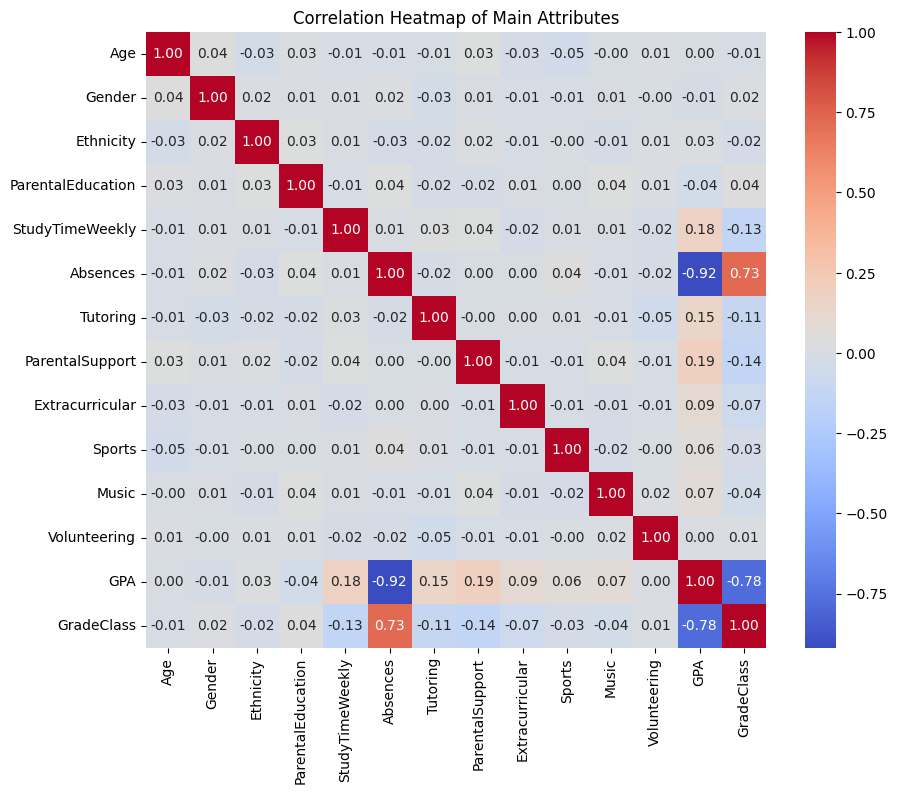

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
        'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular',
        'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']

plt.figure(figsize=(10,8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Main Attributes")
plt.show()

### Correlation Heatmap Analysis

**Description:**  
The correlation heatmap illustrates the relationships among all main numeric attributes in the dataset.  
It helps identify which variables are related and how strongly they influence each other.

**Insights:**  
- **GPA** has a **positive correlation** with **StudyTimeWeekly (0.18)** and **ParentalSupport (0.19)** — students who study more and receive higher parental support tend to achieve better grades.  
- **Absences** shows a **strong negative correlation** with **GPA (-0.92)** and a **positive correlation** with **GradeClass (0.73)** — more absences lead to lower GPA and worse grade category.  
- **GradeClass** and **GPA** are strongly correlated **(-0.78)**, confirming that grade levels directly reflect GPA performance.  
- Other variables like sports, music, and extracurricular participation have weaker but informative relationships with academic outcomes.

**Decision:**  
Keep all features for modeling, but in **Phase 3**, focus more on highly correlated predictors like  
`StudyTimeWeekly`, `Absences`, `ParentalSupport`, and `GPA`.  
These have the strongest influence on the students' performance and classification results.

---
### Snapshot

In [12]:
print("Before Preprocessing:")
raw_df = pd.read_csv("LujainAlmajyul-it326/Dataset/Raw_dataset.csv")
display(raw_df.head())

print("After Preprocessing:")
display(df.head())

Before Preprocessing:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


After Preprocessing:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,StudyTimeWeekly_transformed,GPA_scaled,Absences_scaled,GPA_binned
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1.624898,1.118086,-0.890822,3.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0.982232,1.242374,-1.717694,3.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,-0.952350,-1.960277,1.353542,0.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0.127953,0.161790,-0.063951,2.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,-0.856924,-0.675573,0.290422,1.0


### Raw vs Preprocessed Dataset Snapshot

**Description:**  
The comparison above shows the **Raw dataset** (before preprocessing) and the **Preprocessed dataset** (after applying all transformations).  
The raw data contained only the original features such as `Age`, `Gender`, `Ethnicity`, `ParentalEducation`, `StudyTimeWeekly`, and `Absences`,  
while the preprocessed data includes new engineered columns like `StudyTimeWeekly_transformed`, `GPA_scaled`, `Absences_scaled`, and `GPA_binned`.

**Insight:**  
The snapshot clearly demonstrates how preprocessing changed the data scale and structure:  
- Numeric columns were normalized and standardized to make them comparable.  
- The feature `StudyTimeWeekly` was transformed using Yeo–Johnson to reduce skewness.  
- A new categorical version of GPA (`GPA_binned`) was added to support classification.  
- No missing or noisy data remained, and categorical values were already numeric and consistent.  


---
### Save Preprocessed Dataset


In [13]:
import os
import pandas as pd

df.to_csv('/content/LujainAlmajyul-it326/Dataset/Preprocessed_dataset.csv', index=False)
print("✅ Preprocessed dataset saved successfully!")

✅ Preprocessed dataset saved successfully!
